In [1]:
import auxilary_functions as aux
from PyDSTool import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
DSargs      = args(name='Notch_EMT_1cell', checklevel=2)
DSargs.pars = aux.parameters(onecell=True)
DSargs.varspecs = aux.equations(onecell=True)
DSargs.fnspecs  = aux.functions()
DSargs.ics      = {'W': 20000.0, 'Z': 40000.0,'Y': 20000.0,'S': 200000.0
                  ,'N':  0.0e+0, 'D': 0.0e+0, 'J': 0.0e+0, 'I': 20.0e+0
                  }
DSargs.xdomain  = {'W': [0, 5.0e+4],'Z': [0, 5.0e+6],'Y': [0, 5.0e+4],'S': [0, 5.0e+5]
                  ,'N': [0, 5.0e+5],'D': [0, 5.0e+5],'J': [0, 5.0e+5],'I': [0, 5.0e+5]
                  }
DSargs.pdomain  = {'Dt': [-0.0e+3, 1.0e+3],'Jt': [-0.0e+3, 1.0e+4],'It': [-0.0e+3, 3.0e+3]
                  }
DSargs.tdomain  = [0., 100.0]
DSargs.algparams= {'init_step':1.0e-1}
ODE = Vode_ODEsystem(DSargs)

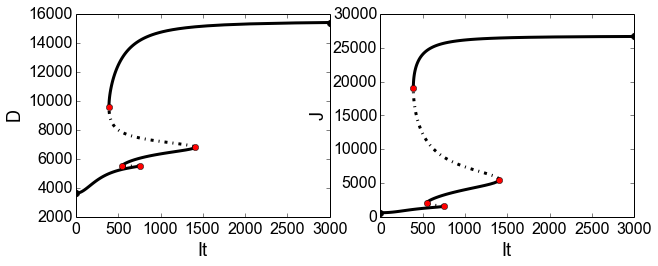

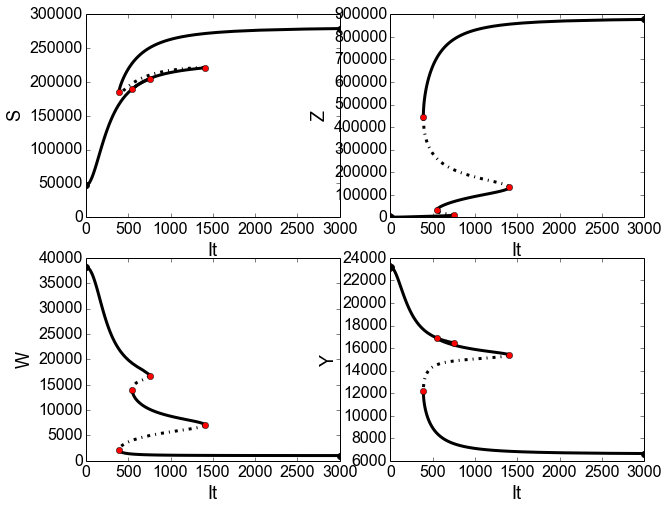

In [3]:
DSargs.pars['gJ']   = 3.0e+1
DSargs.pars['gD']   = 3.0e+1
DSargs.pars['Nt']   = 5.0e+3
DSargs.pars['Dt']   = 0.1e+0
DSargs.pars['Jt']   = 0.1e+0

ODE = Vode_ODEsystem(DSargs)
fp=aux.fast_fixedpoint(ODE)
freepar = 'It'
aux.plot_continuation(ODE, freepar, keys=['D','J'], ncol=2, nrow=2, LocBifPoints=['LP','B'],
                      bif_startpoint=0.1, maxstep=5e+3, minstep=1e-1, step=5e+2, silence=True, 
                      fs=[5,4], ics=[fp], fontsize=16, xlim=[0, 3000])
plt.show()
aux.plot_continuation(ODE, freepar, keys=['S','Z','W','Y'], ncol=2, nrow=2, LocBifPoints=['LP','B'],
                      bif_startpoint=0.1, maxstep=5e+3, minstep=1e-1, step=5e+2, silence=True, 
                      fs=[5,4], ics=[fp], fontsize=16, xlim=[0, 3000])